In [1]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:lastenhoidon')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [3]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [4]:
print(meta['description'])

Lastenhoidon tukia tilastointiajanjakson aikana saaneet perheet ja lapset, joista tukia on maksettu, maksetut tuet, keskimääräinen tuki sekä yksityisen päivähoidon tuottajan perimä hoitomaksu kuukaudessa. Lakisääteisten tukien lisäksi raportilta saa tiedot kuntien Kelan kautta maksamista kuntalisistä. Aluetiedot voi valita raportille joko tuen saajan asuinkunnan tai tuen maksaneen kunnan mukaan.Lastenhoidon tuilla tarkoitetaan taloudellista tukea lasten hoidon järjestämiseksi. Tukimuotoja ovat kotihoidon tuki, yksityisen hoidon tuki, osittainen hoitoraha ja joustava hoitoraha.


**Datan muuttujatieto**

In [5]:
json_normalize(meta['resources'][0]['schema']['fields'])

,format,name,type,values
0,default,kuntanumero,integer,"[5, 9, 10, 16, 18, 19, 20, 46, 47, 49, 50, 51,..."
1,default,kunta,string,"[Alajärvi, Alavieska, Alavus, Asikkala, Askola..."
2,default,aikajakso,string,"[vuosi, kuukausi]"
3,default,tukien_sisalto,string,"[Lakisääteiset tuet, Lakisääteiset tuet ja kun..."
4,default,tukimuoto,string,"[Yhteensä, Kotihoidon tuki, Yksityisen hoidon ..."
5,default,sukupuoli,string,"[Yhteensä, Miehet, Naiset]"
6,default,saajat,number,"[4, 999]"
7,default,lapset,number,"[2, 999]"
8,default,maksetut_etuudet_euroa,number,"[-1209, 999879]"
9,default,tuki_per_saaja_e_kk,number,"[0, 1684]"


**Datan ensimmäiset rivit**

In [6]:
print(dat.head())

   kuntanumero      kunta aikajakso      tukien_sisalto tukimuoto sukupuoli  \
0            5   Alajärvi     vuosi  Lakisääteiset tuet  Yhteensä  Yhteensä   
1            5   Alajärvi     vuosi  Lakisääteiset tuet  Yhteensä    Miehet   
2            5   Alajärvi     vuosi  Lakisääteiset tuet  Yhteensä    Naiset   
3            9  Alavieska     vuosi  Lakisääteiset tuet  Yhteensä  Yhteensä   
4            9  Alavieska     vuosi  Lakisääteiset tuet  Yhteensä    Miehet   

   saajat  lapset  maksetut_etuudet_euroa  tuki_per_saaja_e_kk  \
0   263.0   472.0                697876.0               339.01   
1    13.0    19.0                 26416.0               345.00   
2   250.0   462.0                671459.0               338.88   
3    73.0   144.0                185966.0               336.63   
4     5.0     8.0                  5771.0               360.00   

   tuki_per_lapsi_e_kk  hoitomaksu_per_saaja_e_kk  hoitomaksu_per_lapsi_e_kk  \
0               202.55                       0.0

In [7]:
plotdat = (dat
 .query('aikajakso == "vuosi"')
 .query('vuosi == "2018"')
 .query('tukimuoto == "Kotihoidon tuki"')
 .query('tukien_sisalto == "Lakisääteiset tuet"')
 .query('sukupuoli == "Yhteensä"')
 .sort_values(by='tuki_per_saaja_e_kk', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

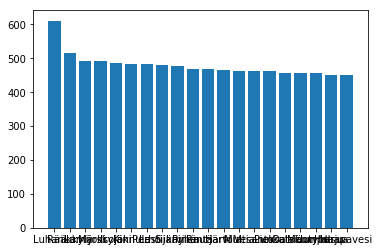

In [8]:
plt.bar(plotdat['kunta'], plotdat['tuki_per_saaja_e_kk'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [9]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id aikajakso  \
0  '0':15,17 '00':16,18 '01':12 '2007':19 '202':1...    1     vuosi   
1  '0':15,17 '00':12,16,18 '13':8 '19':9 '2007':1...    2     vuosi   
2  '0':15,17 '00':16,18 '2007':19 '201':13 '250':...    3     vuosi   
3  '144':9 '180':13 '185966':10 '2007':19 '336':1...    4     vuosi   
4  '0':15,17 '00':12,14,16,18 '2007':19 '360':11,...    5     vuosi   

  hoitomaksu_per_lapsi_e_kk hoitomaksu_per_saaja_e_kk      kunta kuntanumero  \
0                      0,00                      0,00   Alajärvi           5   
1                      0,00                      0,00   Alajärvi           5   
2                      0,00                      0,00   Alajärvi           5   
3                    350,75                    350,75  Alavieska           9   
4                      0,00                      0,00  Alavieska           9   

  kuukausi lapset maksetut_etuudet_euroa saajat sukupuoli tuki_per_lapsi_e_kk  \
0       NA 